# Introduction

# Questions
Questions need to be asked in other to guide us on what influence the dataset

#### Which of the gender dominated the dataset?

#### Which of the user uses the bike most?

#### Is the majority of users old people or young people?

#### Which of the gender share bike?

#### Which age group spent more time on a trip?
These are the question we are going to be looking into.

#### Importing libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt

#### Read the dataset

In [8]:
#read the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# Data wrangling

#### Assessing data programatically

In [9]:
#check the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [10]:
#check the dataset dimension
df.shape

(183412, 16)

In [11]:
#have a look at dataset table
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [12]:
#check the dataset distribution
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [13]:
#check the columns name
list(df)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

In [14]:
#check for duplication
df['bike_id'].duplicated().sum()

178766

In [15]:
#chech for unique value
df['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [16]:
#check null value in the dataset
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [17]:
#check each counts for subsciber & customer in user_type column
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [18]:
#check the counts for those that share bike
df['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

#### From the dataset assesment, we have an idea of how our data looks like. it is important to know that the dataset is a little bit dirty, we have null values and wrong data type. our main focus features in the dataset are duration hour, user type, age, bike share, start time, end time, start month and end month, start day and end day

# Data Cleaning

#### Define

#### Code

In [19]:
#copy the original dataset
df2 = df.copy()

#### Test

In [20]:
#check it out
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Define

# Code

In [21]:
#Convert the start and end time data type to date format
df2["start_time"] = pd.to_datetime(df2['start_time'], format = '')
df2["end_time"] = pd.to_datetime(df2['end_time'], format = '')

In [22]:
#create a new column & extract year from start year & end year and format it to year
df2['start_year'] = df2['start_time'].dt.year
df2['end_year'] = df2['start_time'].dt.year

In [23]:
#create a new column & extract month from start year & end year and format it to date
df2['start_month'] = df2['start_time'].dt.month_name()
df2['end_month'] = df2['start_time'].dt.month_name()

In [24]:
#create a new column & extract week_day from start year & end year
df2['start_weekday'] = df2['start_time'].dt.day_name()
df2['end_weekday'] = df2['start_time'].dt.day_name()

# Test

In [25]:
df2.head(0)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_year,end_year,start_month,end_month,start_weekday,end_weekday


# Define

# Code

In [26]:
#drop all the null values
#drop all the null values
df2.dropna(axis = 0, inplace = True)

# Test

In [27]:
#check it out
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

# Define

# Code

In [28]:
#Convert duration_seconds to hours and rename it
df2['duration_sec'] = df2['duration_sec']/60
df2.rename(columns = {'duration_sec':'duration_hour'}, inplace = True)

# Test

In [29]:
df2.head(0)

,duration_hour,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_year,end_year,start_month,end_month,start_weekday,end_weekday


# Define

# Code

In [30]:
#Create a new column & extract hours from start time column and change the datatype to hour
df2['start_hour'] = df2['start_time'].dt.hour

# Test

In [31]:
#lets check it out
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_hour            174952 non-null  float64       
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

# Define

# Code

In [32]:
#Get the users that were born after 1925
age = df2[df.member_birth_year > 1925]
age

C:\Users\user\AppData\Local\Temp/ipykernel_17016/3402351106.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age = df2[df.member_birth_year > 1925]


,duration_hour,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_year,end_year,start_month,end_month,start_weekday,end_weekday,start_hour
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,2019,2019,February,February,Thursday,Thursday,17
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,2019,2019,February,February,Thursday,Thursday,12
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,2019,2019,February,February,Thursday,Thursday,17
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,2019,2019,February,February,Thursday,Thursday,23
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,2019,2019,February,February,Thursday,Thursday,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,8.000000,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,1996.0,Male,No,2019,2019,February,February,Friday,Friday,0
183408,5.216667,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,1984.0,Male,No,2019,2019,February,February,Friday,Friday,0
183409,2.350000,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,1990.0,Male,Yes,2019,2019,February,February,Friday,Friday,0
183410,2.316667,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,1988.0,Male,No,2019,2019,February,February,Friday,Friday,0


In [33]:
#lets check it out
df2.shape

(174952, 23)

# Define

# Code

In [34]:
#Drop users who were born before 1925
df2.drop(df2[(df2.member_birth_year < 1925)].index, inplace = True)

# Test

In [35]:
#check it out
sum(df2.member_birth_year < 1925)
df2.shape

(174877, 23)

In [31]:
df2.shape

(174877, 23)

# Define

# Code

In [36]:
#Create Age column and extract the age of users
df2['Age'] = 2022 - df2.member_birth_year

# Test

In [37]:
df2.sample()

,duration_hour,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_year,end_year,start_month,end_month,start_weekday,end_weekday,start_hour,Age
182833,3.316667,2019-02-01 07:48:19.878,2019-02-01 07:51:39.699,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,28.0,The Embarcadero at Bryant St,37.787168,...,Male,No,2019,2019,February,February,Friday,Friday,7,66.0


# Define

# Code

In [38]:
#Delete the unusefull columns
df2 = df2.drop(['start_station_id','start_station_name','start_time','end_time','bike_id','start_station_latitude','start_station_longitude', 'end_station_id',
         'end_station_name', 'end_station_latitude', 'end_station_longitude','member_birth_year','start_station_id'], axis =1)

# Test

In [39]:
#check it out
df2.sample(2)

,duration_hour,user_type,member_gender,bike_share_for_all_trip,start_year,end_year,start_month,end_month,start_weekday,end_weekday,start_hour,Age
64121,10.683333,Subscriber,Male,No,2019,2019,February,February,Wednesday,Wednesday,12,39.0
46571,7.233333,Subscriber,Male,No,2019,2019,February,February,Friday,Friday,9,34.0


In [40]:
list(df2)

['duration_hour',
 'user_type',
 'member_gender',
 'bike_share_for_all_trip',
 'start_year',
 'end_year',
 'start_month',
 'end_month',
 'start_weekday',
 'end_weekday',
 'start_hour',
 'Age']

# Data Exploration

# Univariate Exploration

##### Lets check which of the day has more patronage

Text(0.5, 1.0, 'BIKE USERS DAILY TRIP COUNT')

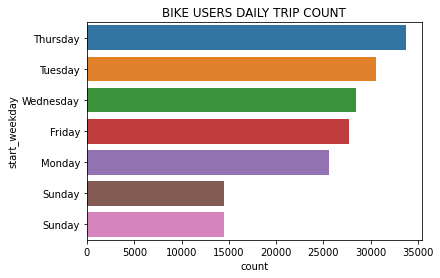

In [41]:
in_order = ''
ax = snb.countplot( data = df2, y = 'start_weekday', order = ['Thursday','Tuesday','Wednesday','Friday','Monday', 'Sunday', 'Sunday'])
plt.title('BIKE USERS DAILY TRIP COUNT')

Text(0.5, 1.0, 'BIKE USERS END DAYS WITH COUNT')

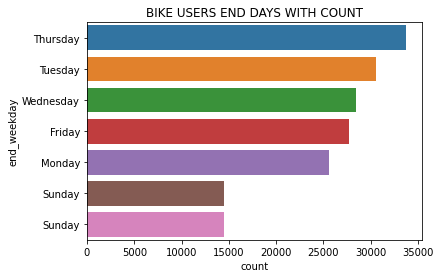

In [42]:
in_order = ''
ax = snb.countplot( data = df2, y = 'end_weekday', order = ['Thursday','Tuesday','Wednesday','Friday','Monday', 'Sunday', 'Sunday'])
plt.title('BIKE USERS END DAYS WITH COUNT')

##### Lets check the month with highest patronage for both start & end month, 

Text(0.5, 1.0, 'BIKE USERS START_MONTH WITH HIHEST PATRONAGE')

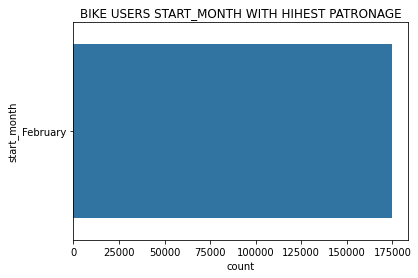

In [43]:
#
in_order = ''
ax = snb.countplot( data = df2, y = 'start_month')
plt.title('BIKE USERS START_MONTH WITH HIHEST PATRONAGE')

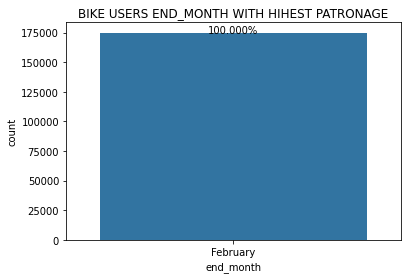

In [44]:
in_order = ''
ax = snb.countplot( data = df2, x = 'end_month')
plt.title('BIKE USERS END_MONTH WITH HIHEST PATRONAGE')
total = len(df2)
for i in ax.patches:
    pct ='{:.3f}%'.format(100*i.get_height()/total)
    x = i.get_x() + i.get_width()/2
    y = i.get_height()+0.5
    ax.annotate(pct,(x,y), ha = 'center')
plt.show()

##### Lets check the month with highest patronage for both start & end YEAR, 

Text(0.5, 1.0, 'BIKE USERS START YEAR WITH HIGHEST PATRONAGE')

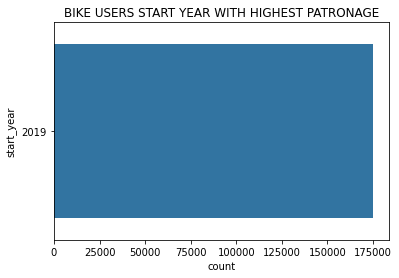

In [45]:
in_order = ''
ax = snb.countplot( data = df2, y = 'start_year')
plt.title('BIKE USERS START YEAR WITH HIGHEST PATRONAGE')

Text(0.5, 1.0, 'BIKE USERS END_YEAR WITH HIHEST PATRONAGE')

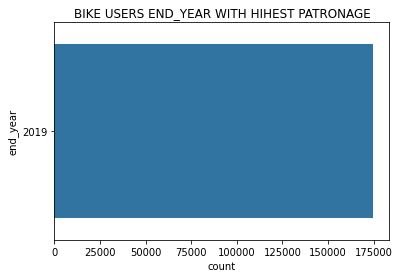

In [46]:
#check the frequency of the endyear column
in_order = ''
ax = snb.countplot( data = df2, y = 'end_year')
plt.title('BIKE USERS END_YEAR WITH HIHEST PATRONAGE')

##### Lets check the user_type with highest members

Text(0.5, 1.0, 'Subscriber & Customer Count')

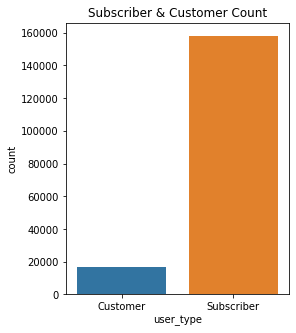

In [47]:
plt.figure(figsize = (4,5))
ax = snb.countplot(data = df2, x = 'user_type')
plt.title('Subscriber & Customer Count')


# Bivariate Exploration

##### RELATIONSHIP Between USER TYPE & BIKE SHARE

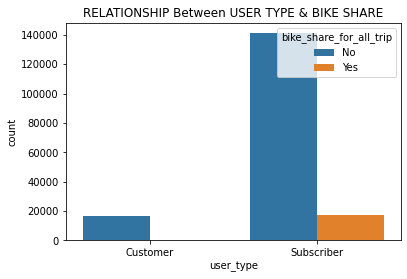

In [48]:
#only Subscriber share bike with fewer numbers
plt.title('RELATIONSHIP Between USER TYPE & BIKE SHARE')
ax = snb.countplot(x = 'user_type', hue = 'bike_share_for_all_trip', data = df2 )

##### Lets check age & Gender Relationship

Text(0.5, 1.0, 'Age & Gender Relationship')

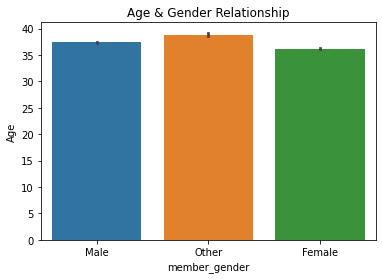

In [49]:
#lets check if which age group dominated the gender
ax = snb.barplot(data = df2, y ='Age', x = 'member_gender')
plt.title('Age & Gender Relationship')

##### LETS CHECK CUSTOMER TYPE VS AGE RANGES

Text(0.5, 1.0, 'CUSTOMER TYPE VS AGE RANGES')

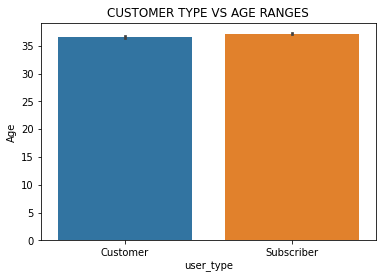

In [51]:
#lets check the ade ranges using user typer
ax = snb.barplot(data = df2, y ='Age', x = 'user_type')
plt.title('CUSTOMER TYPE VS AGE RANGES')

##### Lets check the frequency of the age of the bike users

Text(0.5, 1.0, 'Age Distribution')

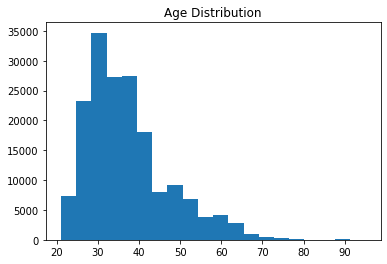

In [52]:
#Lets check the frequency of the age
plt.hist(x ='Age', data = df2, bins = 20)
plt.title('Age Distribution')

Age bracket of 25 to 50 are the major users of the bike, older people find it difficult to use the bike

# Multivirate Exploration

##### Lets Check the avearage hours of usertype

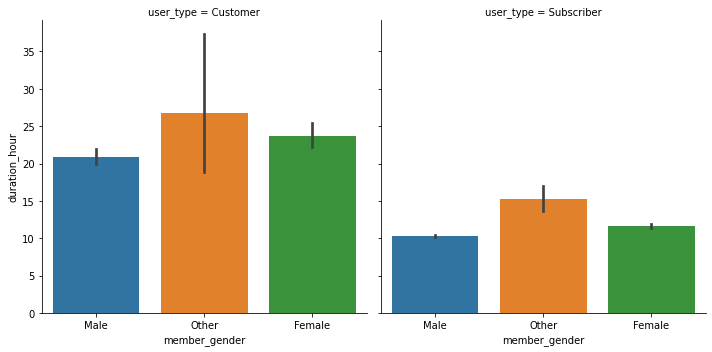

In [53]:
#customers has mean longer hours compare to subscribers like Other gender has the highest duration hours
snb.catplot(x = 'member_gender', y = 'duration_hour', col ='user_type', data = df2, kind = 'bar')

##### Lets check Age and trip duration for each user type

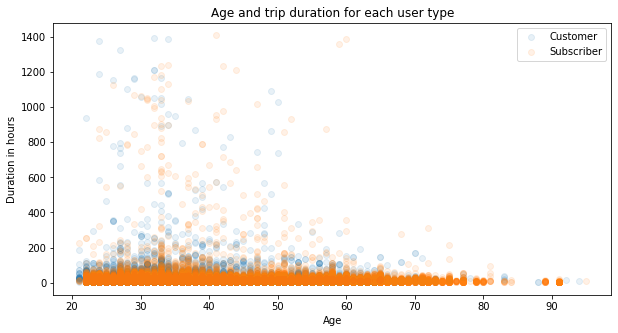

In [54]:
#older users spent short hours on ride why young users spent much hours and the customer type has the highest user duration
df2 = df2.sample(174877, random_state = 1)
plt.figure(figsize = [10,5]);
user_type_markers = [['Customer', 'o'],['Subscriber', 'x']]
for cat, marker in user_type_markers:
    df_cat = df2[df2['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'Age', y = 'duration_hour', alpha = 2/20);
    plt.legend(['Customer', 'Subscriber']);
    plt.xlabel('Age');
    plt.ylabel('Duration in hours');
    plt.title('Age and trip duration for each user type');

#### Lets check the user type with highest gender count & duration

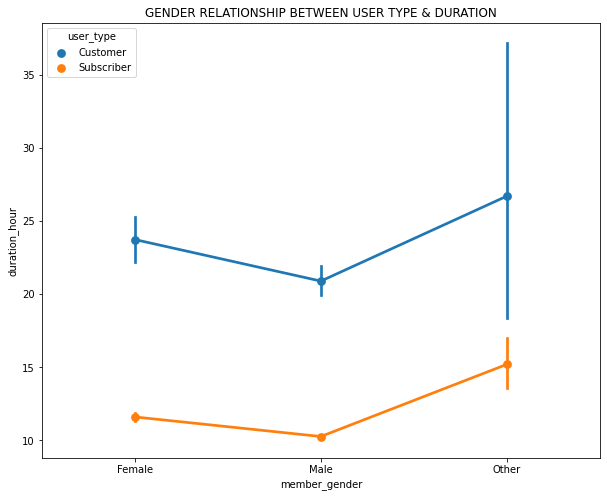

In [55]:
fig = plt.figure(figsize = [10,8])
ax = snb.pointplot(data = df2, x = 'member_gender', y = 'duration_hour', lines = '',hue = 'user_type', dodge = 0.0)
ax.set_yticklabels([], minor = True)
plt.title('GENDER RELATIONSHIP BETWEEN USER TYPE & DURATION')
plt.show()

For both customer and subscriber, Other gender spent more hours on trip compared to female and male and customer spend more duration on trip

##### Lets check which of the gender has highest bike sharing count & duration

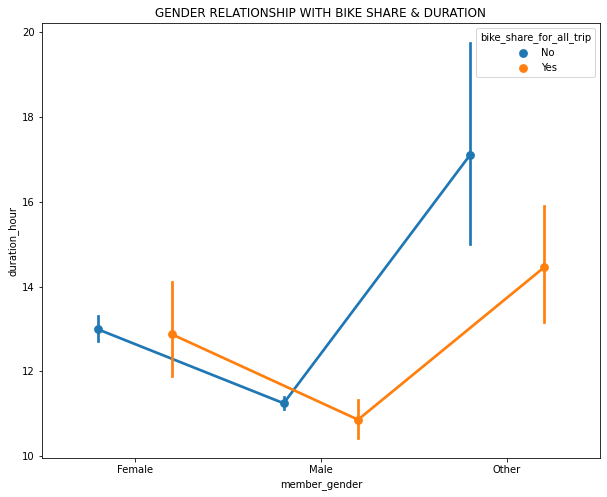

In [56]:
fig = plt.figure(figsize = [10,8])
ax = snb.pointplot(data = df2, x = 'member_gender', y = 'duration_hour', lines = '',hue = 'bike_share_for_all_trip', dodge = 0.4)
ax.set_yticklabels([], minor = True)
plt.title('GENDER RELATIONSHIP WITH BIKE SHARE & DURATION')
plt.show()

The other gender both in duration & bike share  spent more hours on trip followed by female and male

# CONCLUSSION
Judging from all the analysis,
Customers have longer duration trip compared to subscriber
it is only subscriber that shared bike
The most bike users are younger people
Most trips were taken on tuesday & thursday
weekend records low patronage
feburary 2019 records the highest patronage
Male were the most user of the bike
85% percent of the trip were taken by subscibers
However, the angle of view of the dataset are sky limited, more exploration can still be done

In [57]:
!jupyter nbconvert project3-Copy2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook project3-Copy2.ipynb to slides
[NbConvertApp] Writing 884527 bytes to project3-Copy2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\user\appdata\local\programs\python\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\user\AppData\Local\Programs\Python\Python39\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\traitlets\config\application.py", 